### LIBRARY

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### DATASET

In [150]:
X_data = pd.read_csv("linearX.csv", header=None).values.flatten()
y_data = pd.read_csv("linearY.csv", header=None).values.flatten()

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)

print("X_data:", X_data[:5])
print("y_data:", y_data[:5])


X_data shape: (100,)
y_data shape: (100,)
X_data: [9.1 8.  9.1 8.4 6.9]
y_data: [0.99523 0.99007 0.99769 0.99386 0.99508]


### DATA PREPROCESSING USING MIN-MAX SCALING

In [151]:
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))
y = (y_data - np.min(y_data)) / (np.max(y_data) - np.min(y_data))

X = np.c_[np.ones(X.shape[0]), X]

### VALIDATE

In [152]:
print("Normalized X shape:", X.shape)
print("Normalized y shape:", y.shape)

Normalized X shape: (100, 2)
Normalized y shape: (100,)


## DATA VISUALIZATION

### ORIGINAL DATA

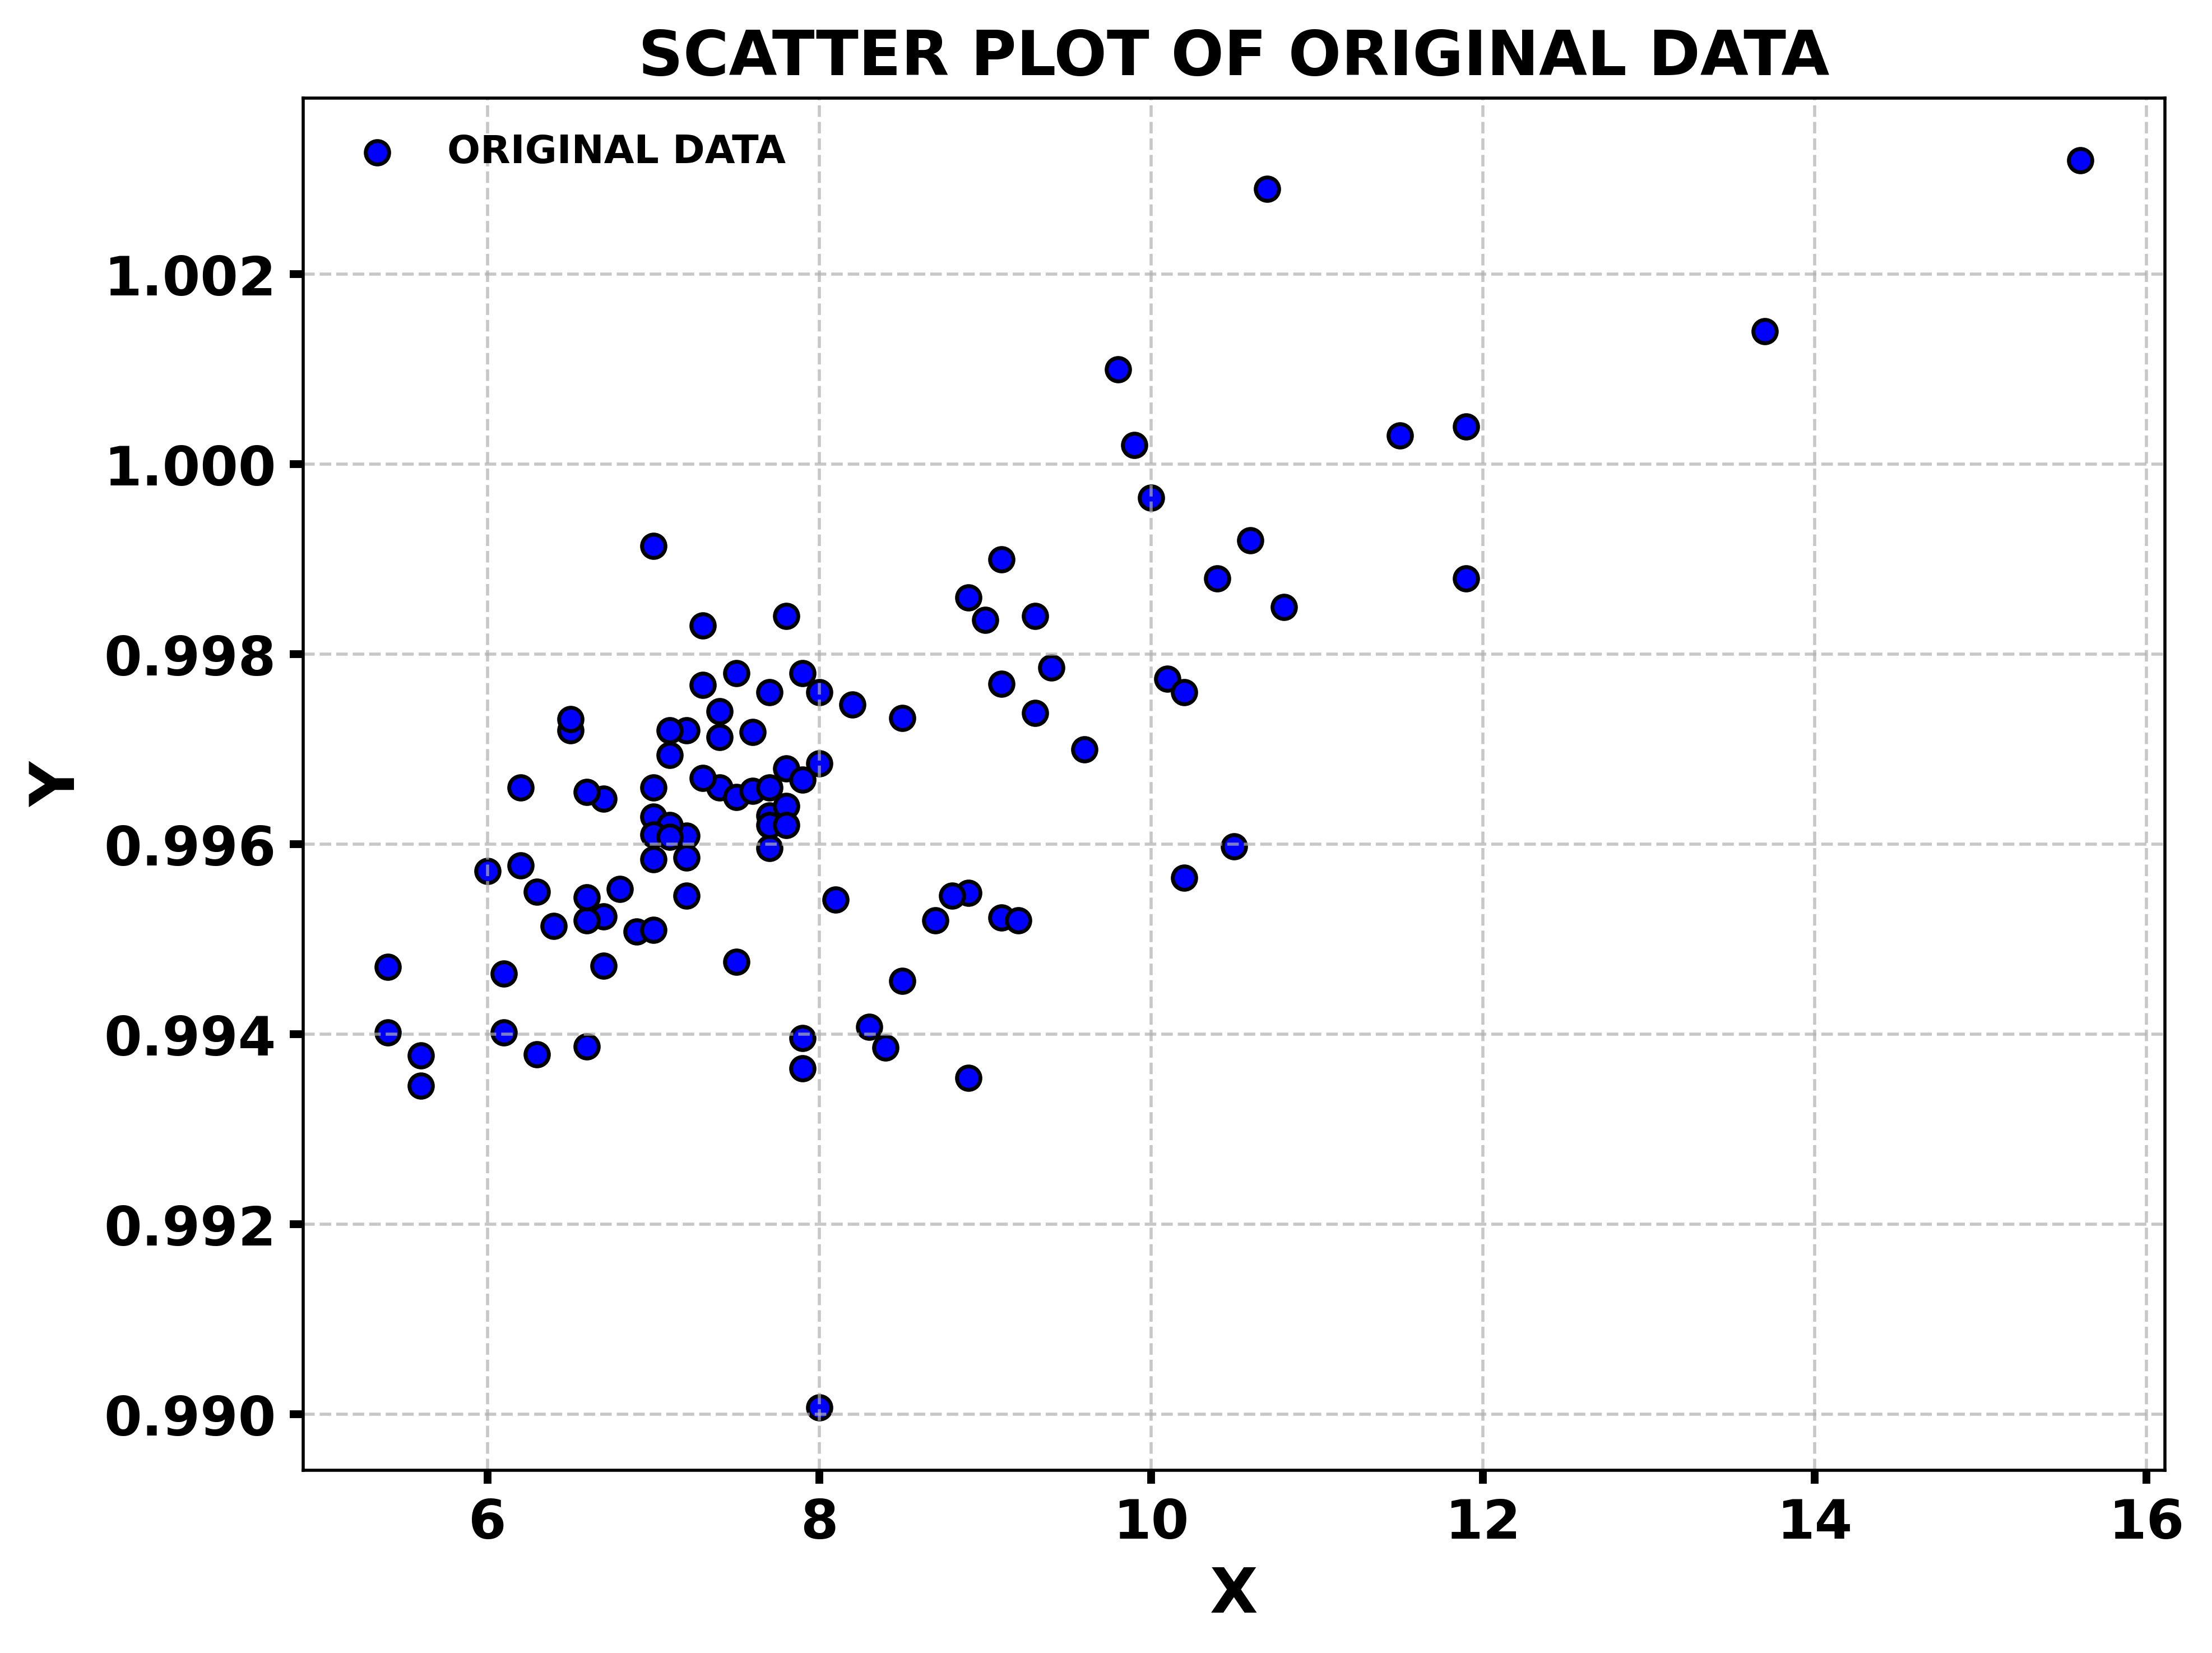

In [153]:
plt.figure(figsize=(8, 6), dpi=500)
plt.scatter(X_data, y_data, color='blue', edgecolor='black', label="ORIGINAL DATA")
plt.title("SCATTER PLOT OF ORIGINAL DATA", fontsize=16, fontweight='bold')
plt.xlabel("X", fontsize=16, fontweight='bold')
plt.ylabel("Y", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=16, frameon=False, prop={'weight': 'bold'})
plt.tight_layout()
plt.show()


### NORMALIZED DATA

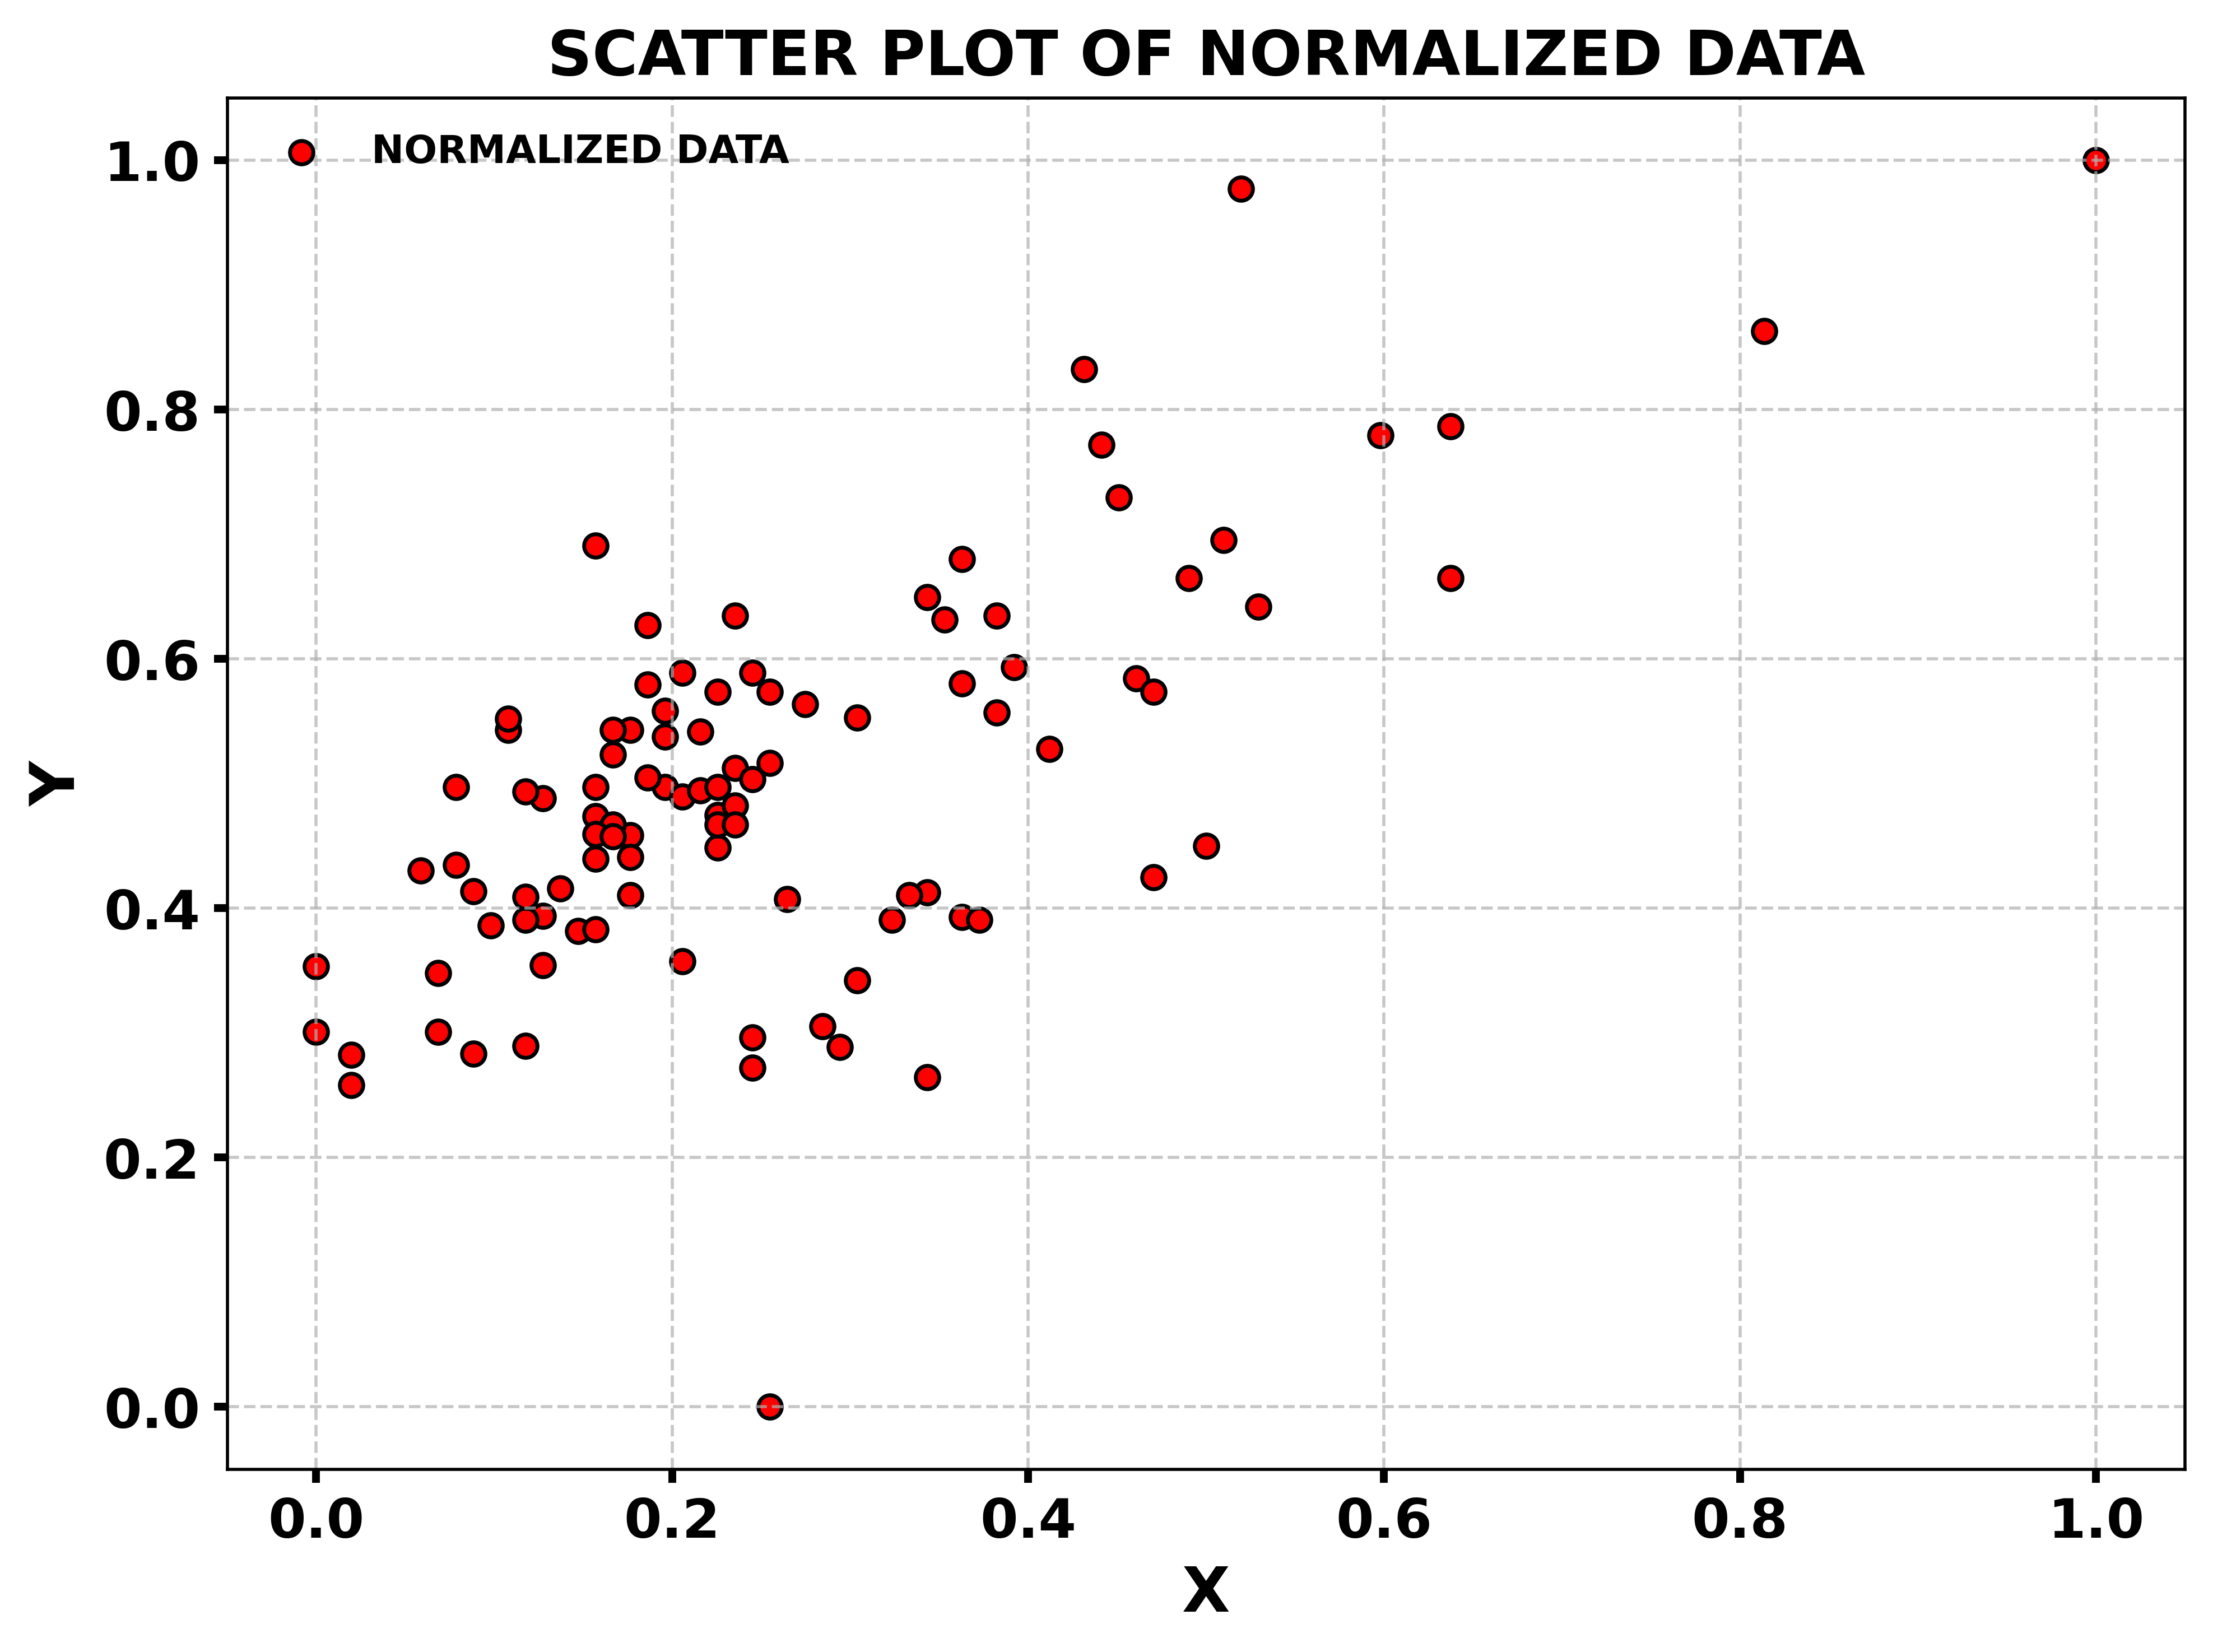

In [154]:
plt.figure(figsize=(8, 6), dpi=500)
plt.scatter(X[:, 1], y, color='red', edgecolor='black', label="NORMALIZED DATA")
plt.title("SCATTER PLOT OF NORMALIZED DATA", fontsize=16, fontweight='bold')
plt.xlabel("X", fontsize=16, fontweight='bold')
plt.ylabel("Y", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=16, frameon=False, prop={'weight': 'bold'})
plt.tight_layout()
plt.show()


### HISTOGRAM PLOT

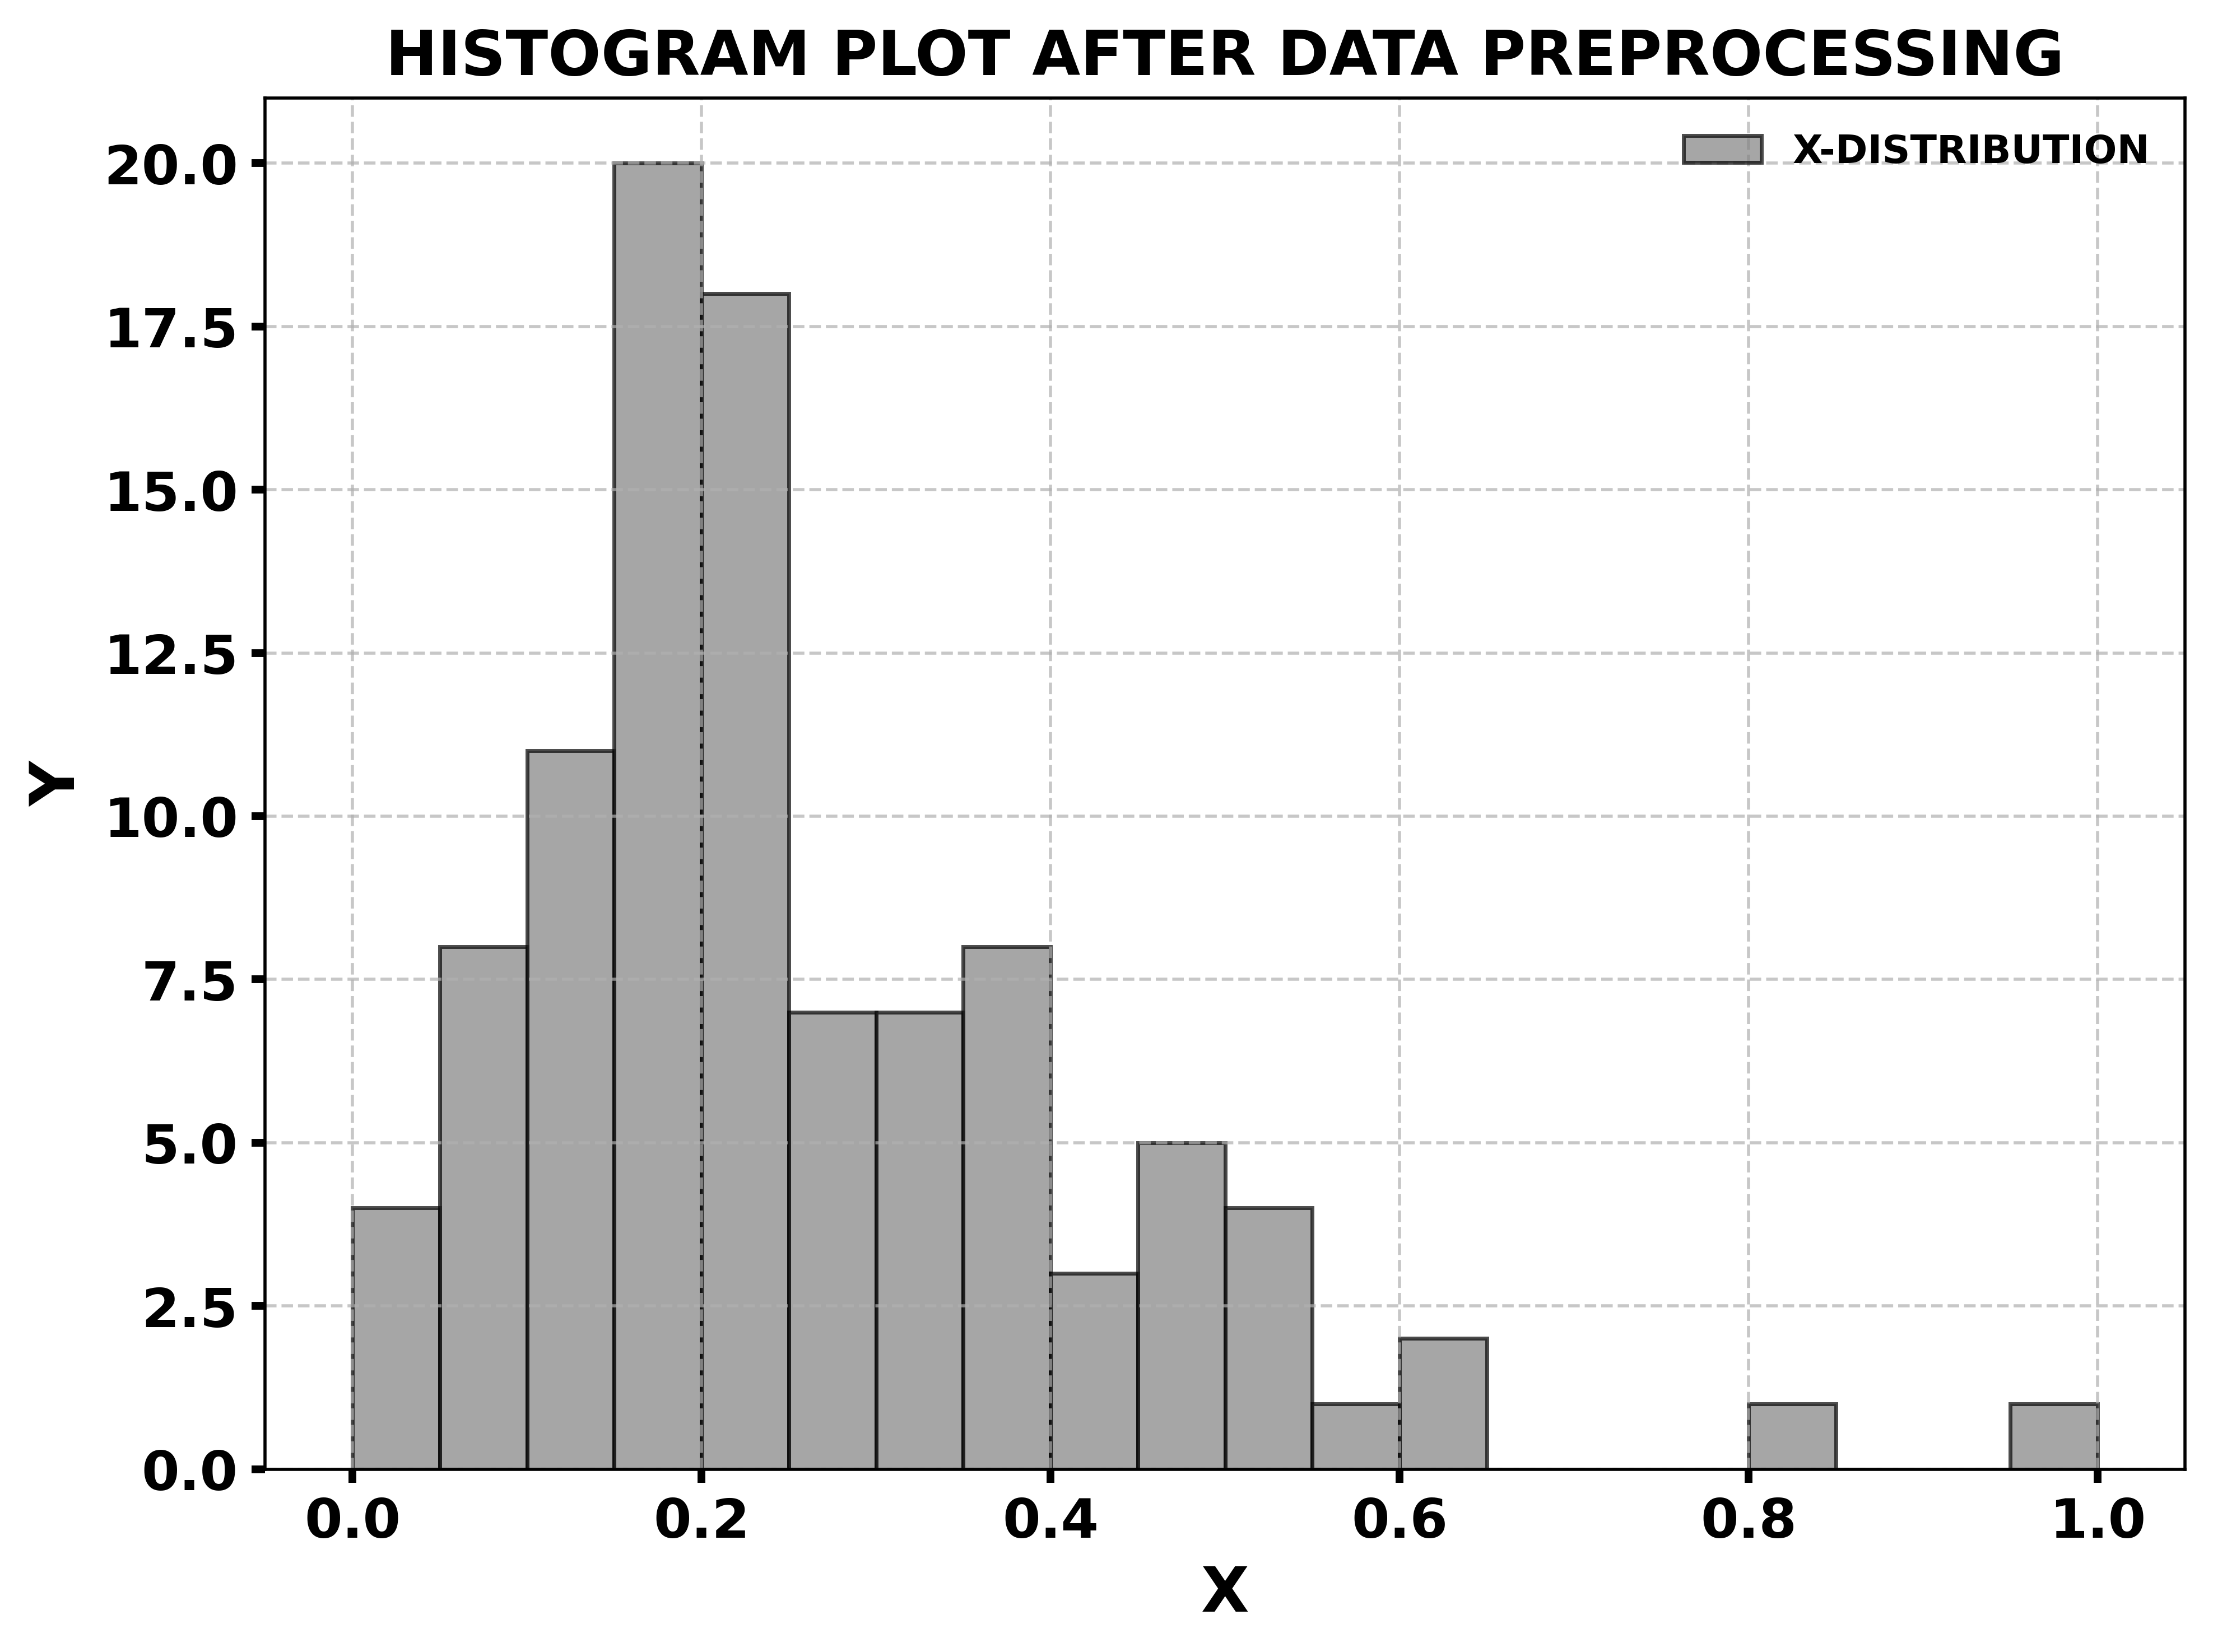

In [155]:
plt.figure(figsize=(8, 6), dpi=500)
plt.hist(X[:, 1], bins=20, color='grey', edgecolor='black', alpha=0.7, label="X-DISTRIBUTION")
plt.title("HISTOGRAM PLOT AFTER DATA PREPROCESSING", fontsize=16, fontweight='bold')
plt.xlabel("X", fontsize=16, fontweight='bold')
plt.ylabel("Y", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=16, frameon=False, prop={'weight': 'bold'})
plt.tight_layout()
plt.show()

### HYPERPARAMETERS

In [156]:
theta = np.zeros((2, 1)) 
learning_rate = 0.5
iterations = 50

### COST FUNCTION

In [157]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
    return cost

### GRADIENT DESCENT

In [158]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y.reshape(-1, 1)
        gradients = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

### TRAIN

In [159]:
final_theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

## PLOTS

### COST FUNCTION

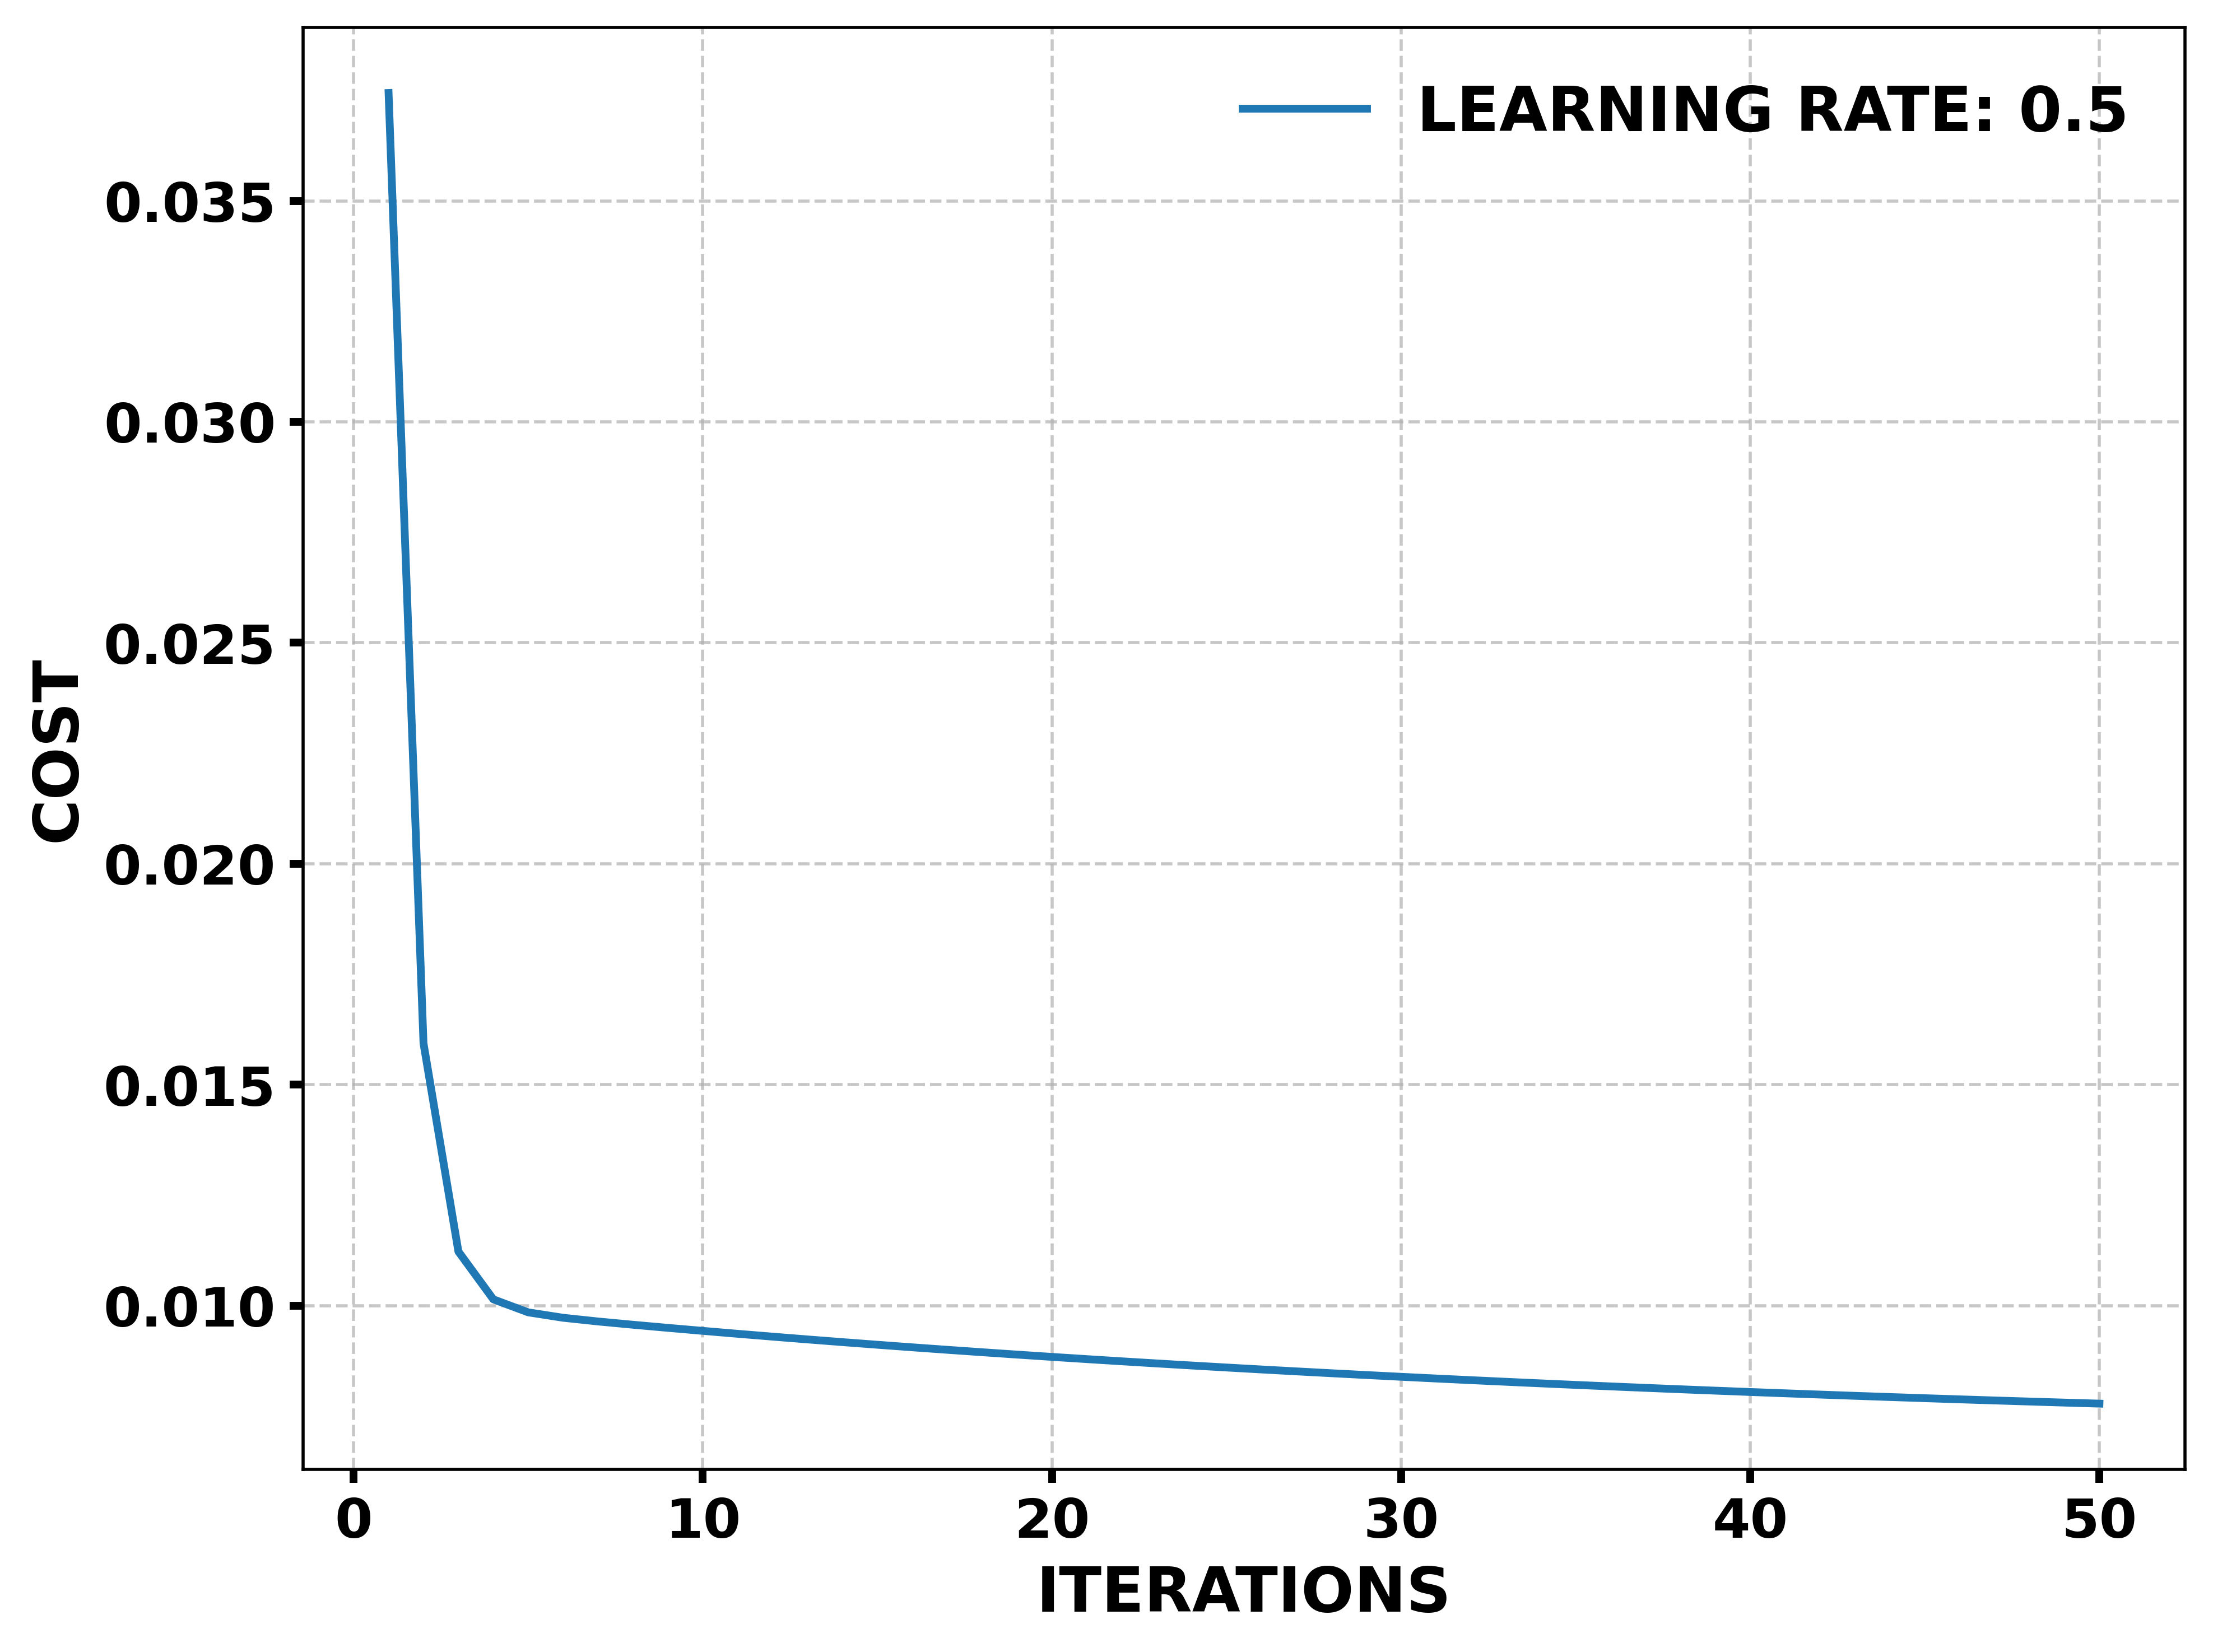

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
ax.plot(range(1, iterations + 1), cost_history, label="LEARNING RATE: 0.5", linewidth=2)
ax.set_xlabel("ITERATIONS", fontsize=16, fontweight='bold')
ax.set_ylabel("COST", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper right', fontsize=16, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')
plt.tight_layout()

plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LinearRegression\COST_FUNCTION.png", dpi=500, bbox_inches='tight')
plt.show()

## REGRESSION LINE

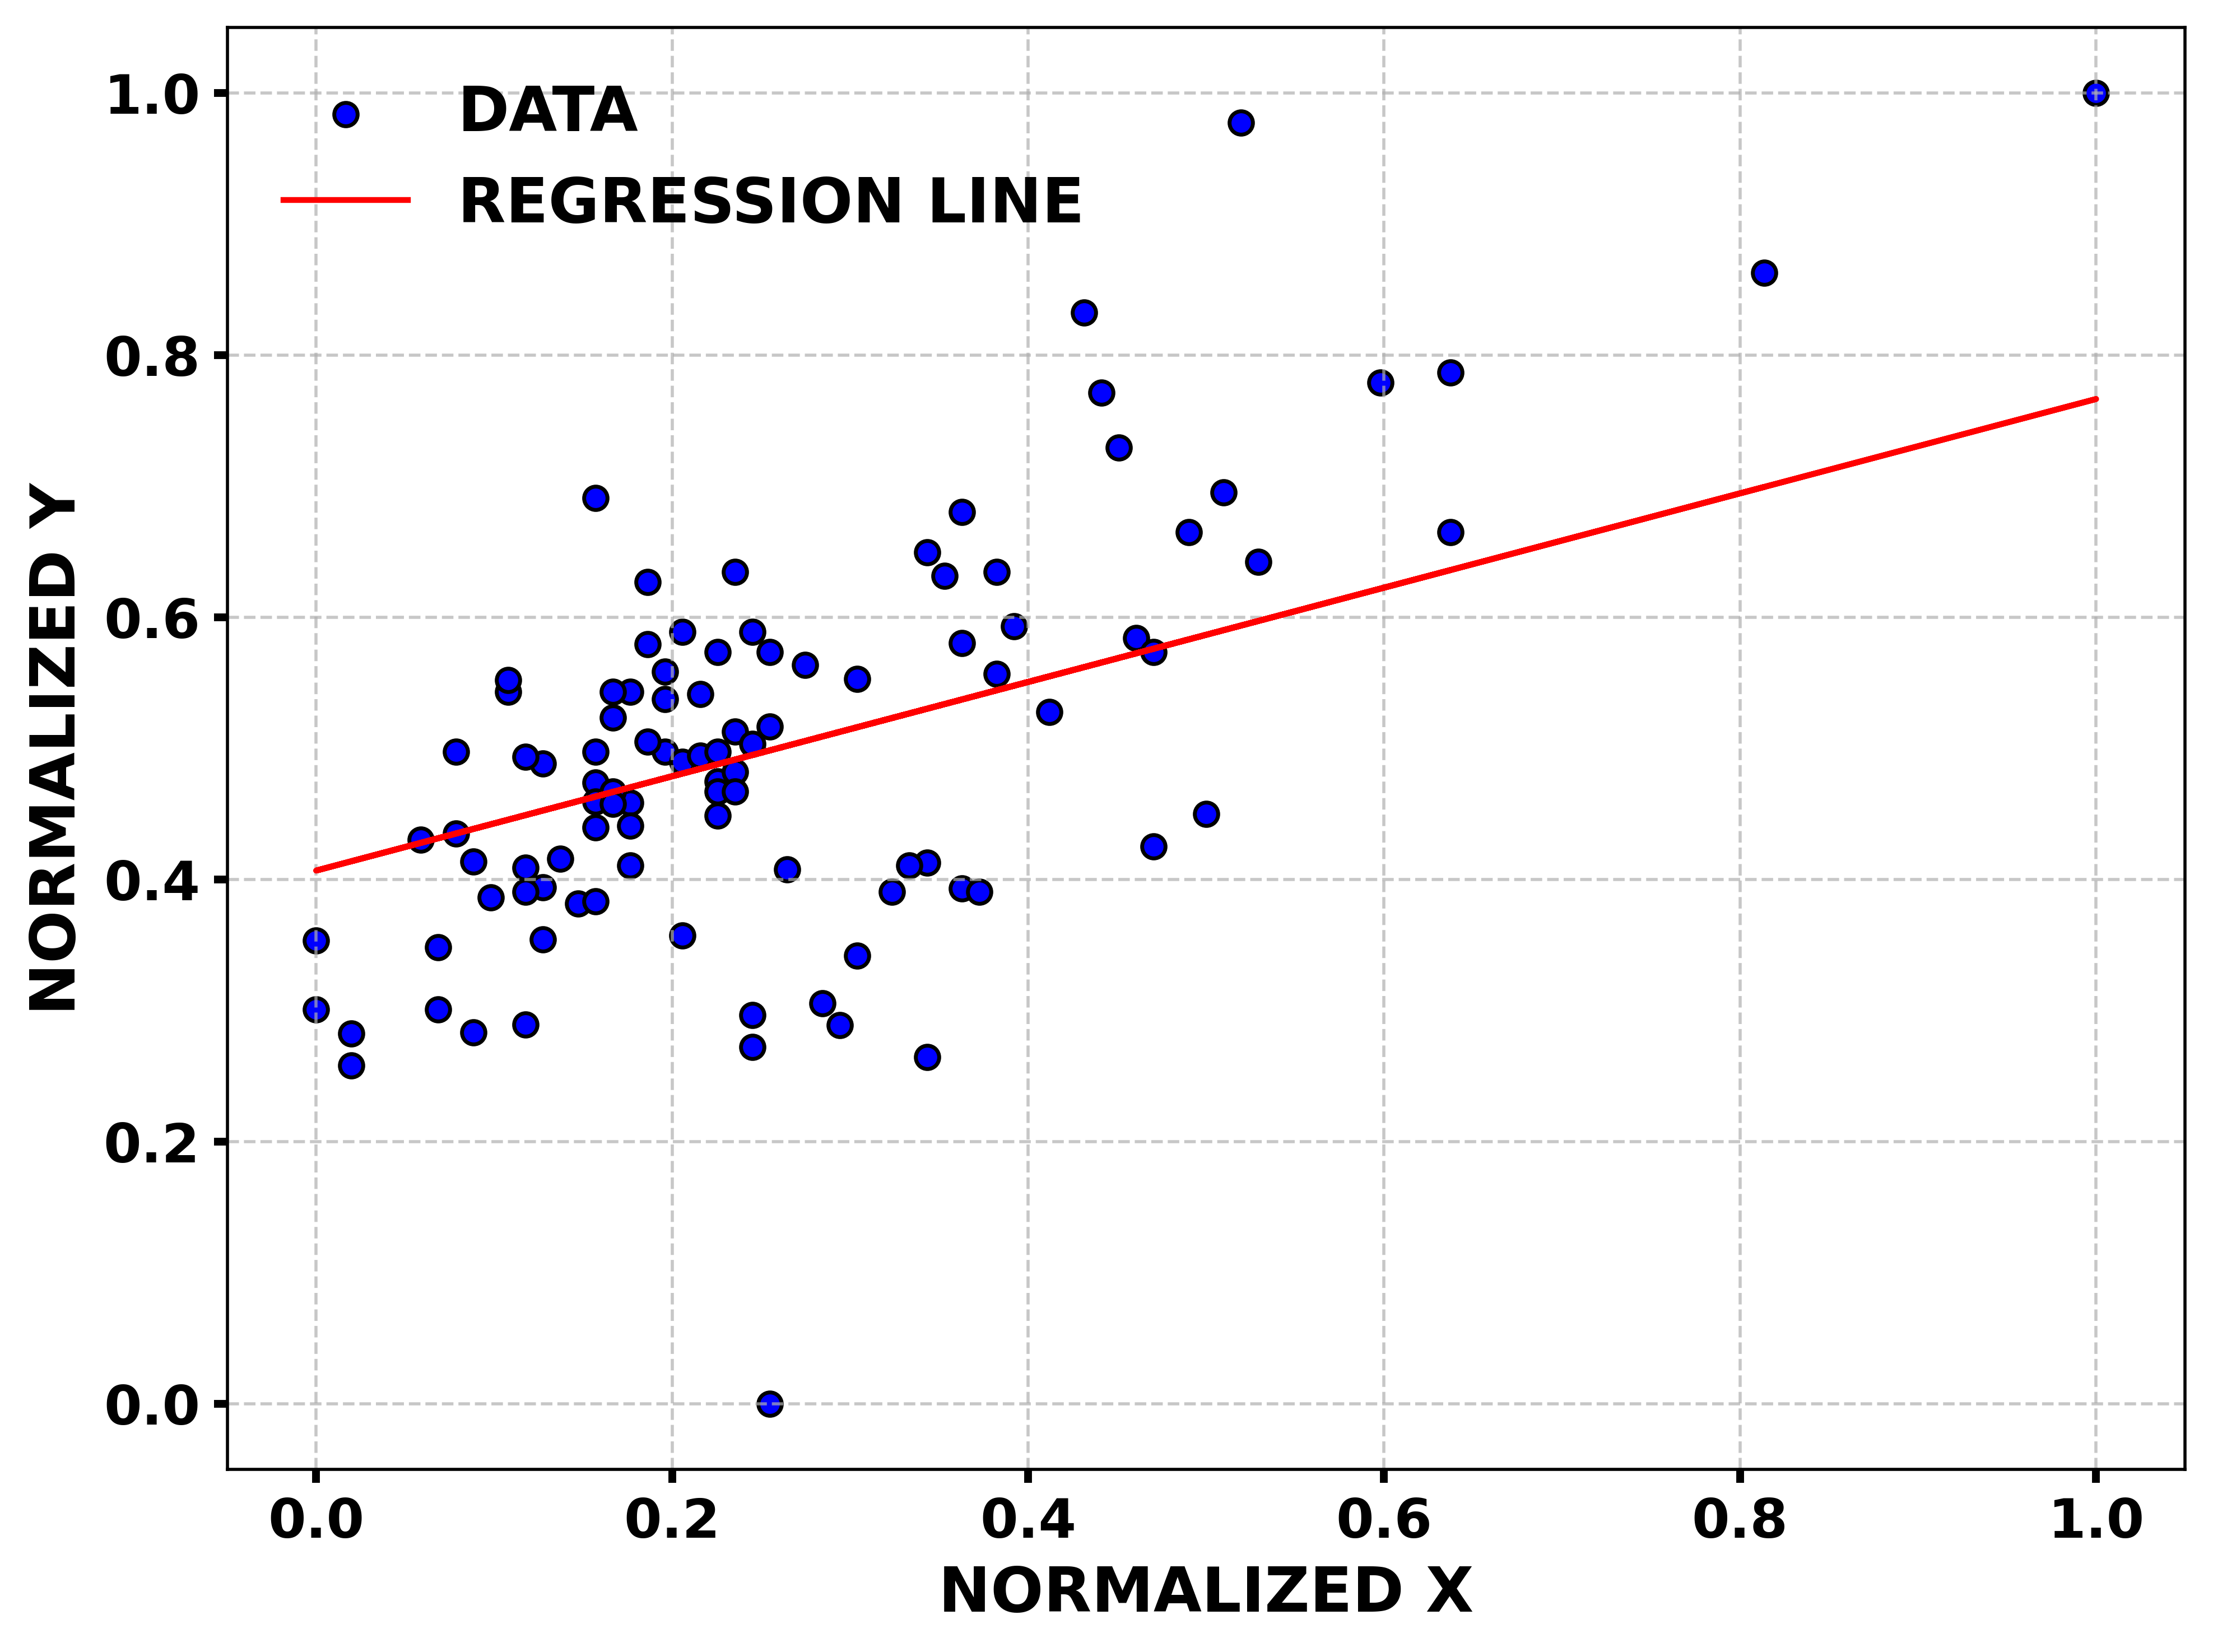

In [161]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
ax.scatter(X[:, 1], y, label="Data", color="blue", edgecolor="black")
predictions = X.dot(final_theta)
ax.plot(X[:, 1], predictions, color="red", label="Model Prediction")
ax.set_xlabel("NORMALIZED X", fontsize=16, fontweight='bold')
ax.set_ylabel("NORMALIZED Y", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(['DATA', 'REGRESSION LINE'], loc='upper left', fontsize=16, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')
plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LinearRegression\REGRESSION_LINE.png", dpi=500, bbox_inches='tight')
plt.show()

In [162]:
print("Final Parameters (Theta):", final_theta.flatten())
print("Final Cost:", cost_history[-1])

Final Parameters (Theta): [0.40672447 0.35975493]
Final Cost: 0.007784690728654539


### NEW HYPERPARAMETERS

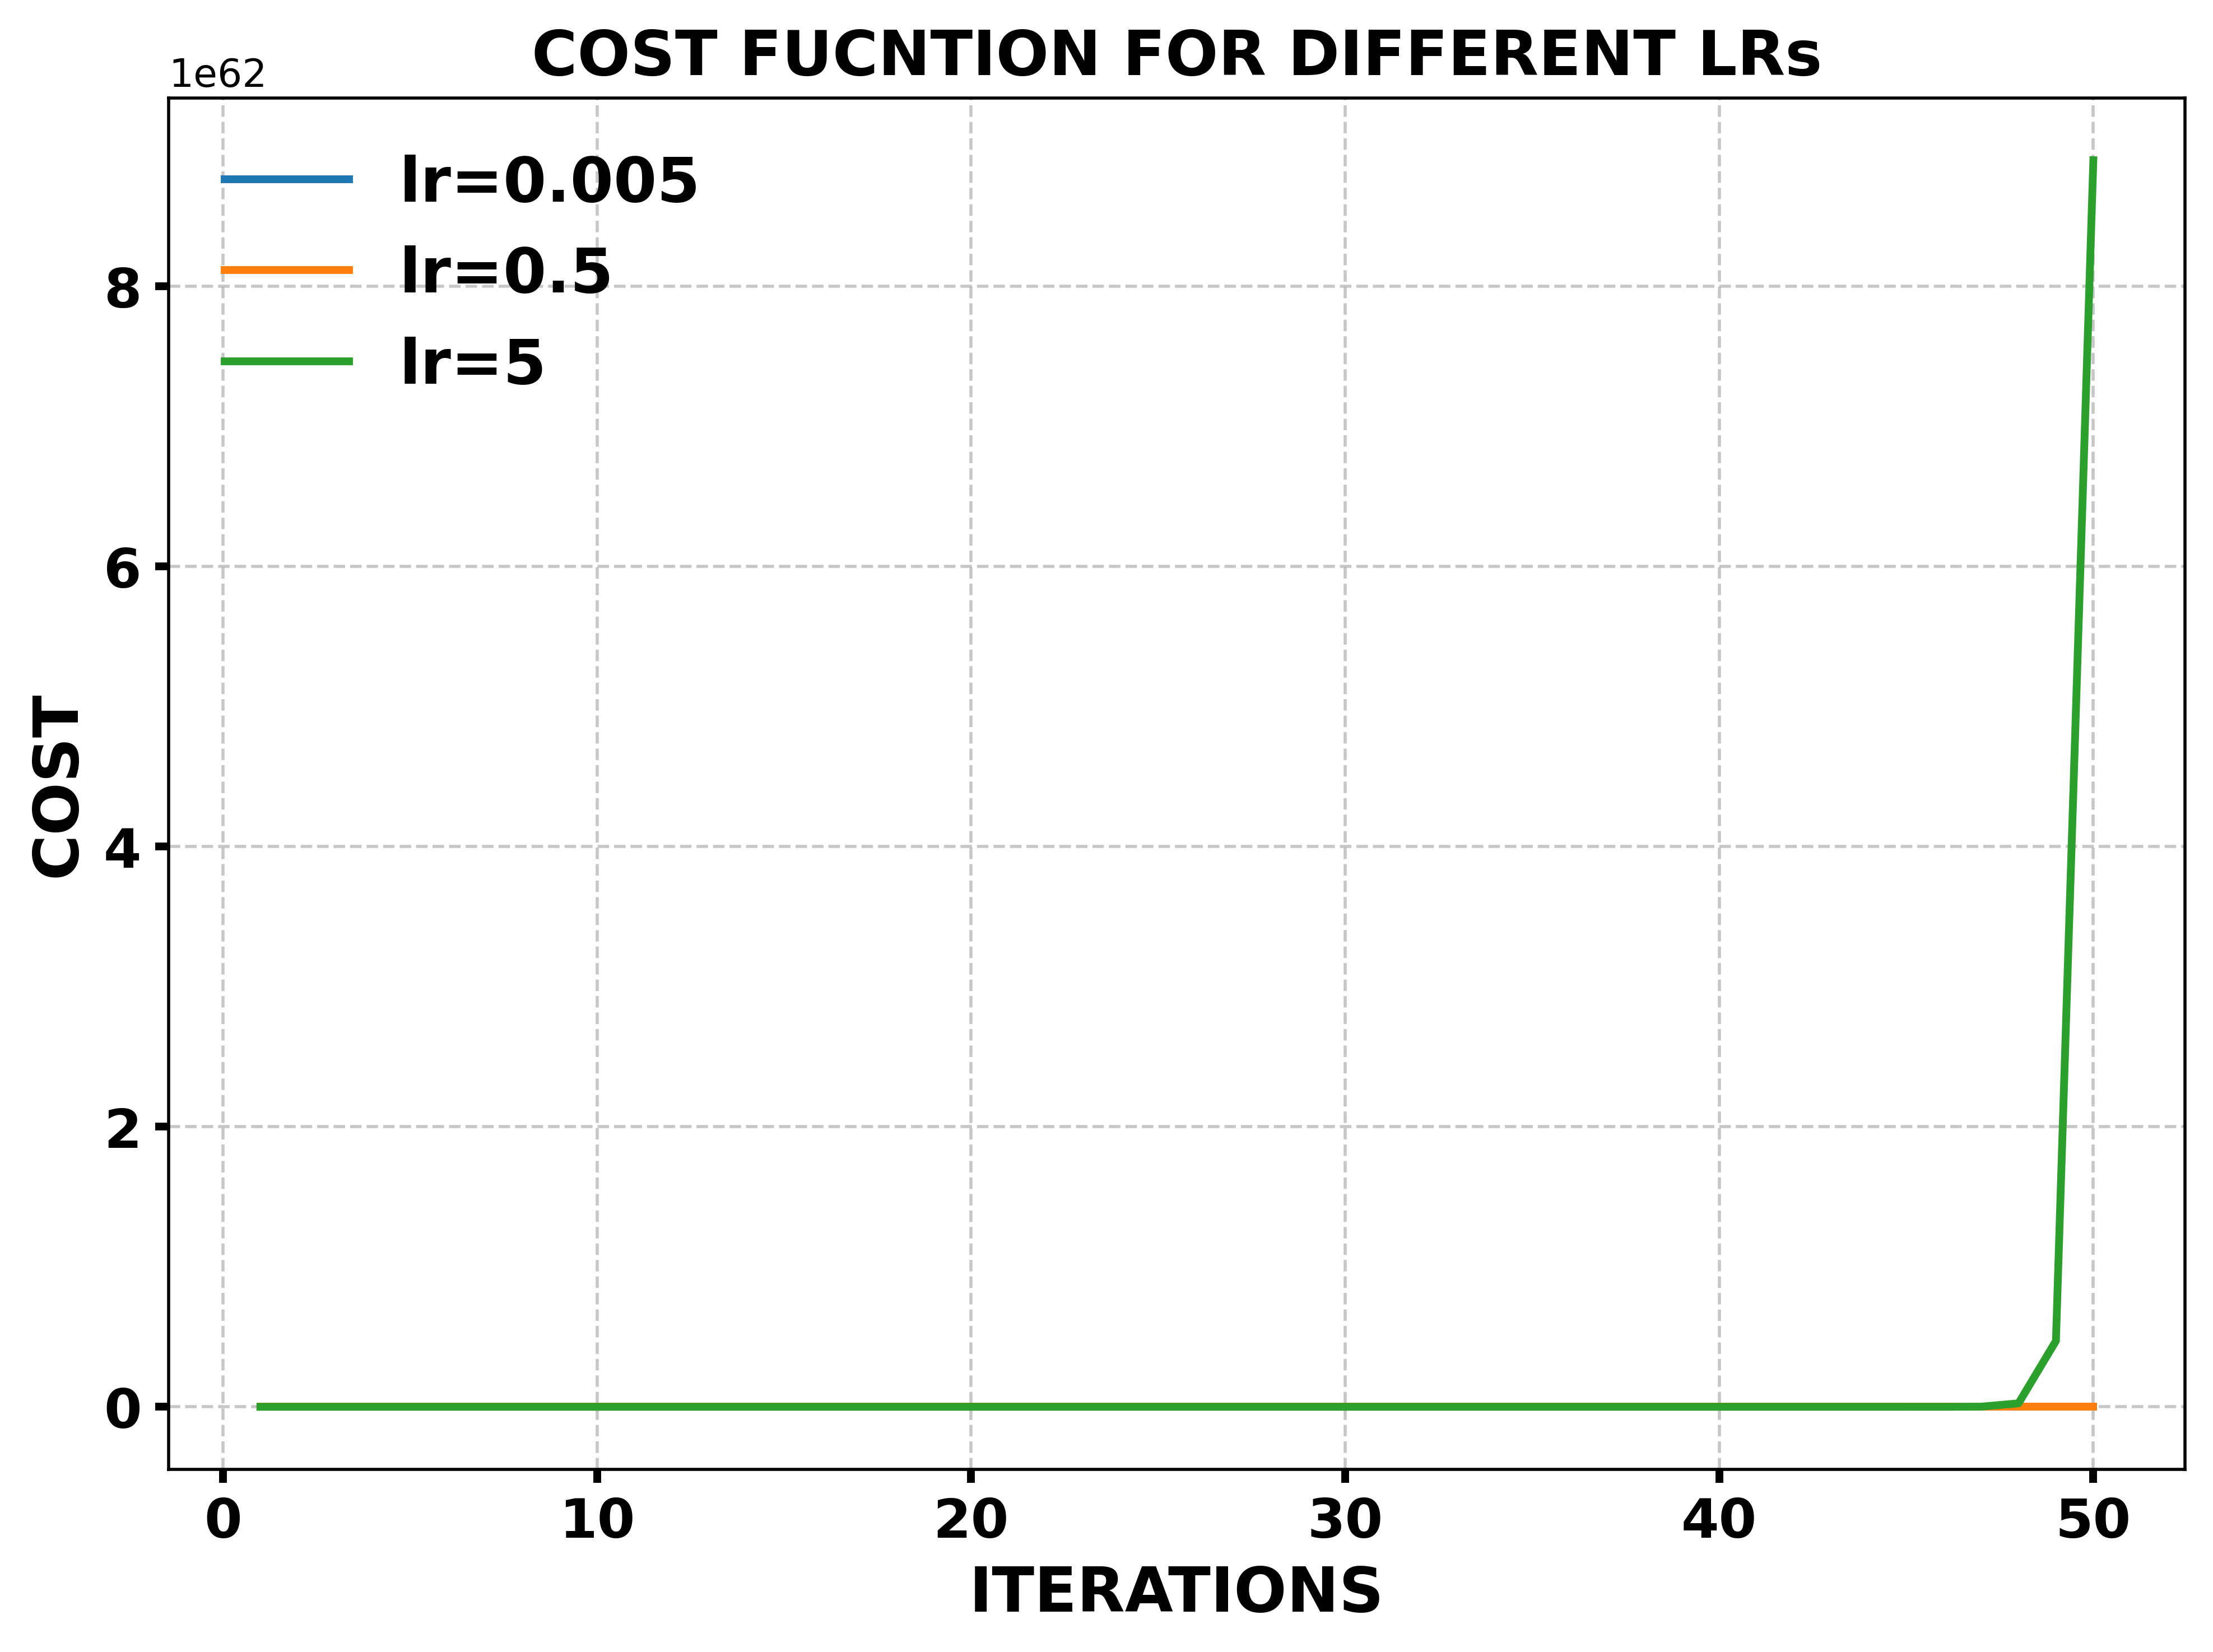

In [ ]:
learning_rates = [0.005, 0.5, 5]
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)

for lr in learning_rates:
    theta = np.zeros((2, 1))
    _, costs = gradient_descent(X, y, theta, learning_rate=lr, iterations=50)
    ax.plot(range(1, 51), costs, label=f"lr={lr}", linewidth=2)

ax.set_title("COST FUCNTION FOR DIFFERENT LRs", fontsize=16, fontweight='bold')
ax.set_xlabel("ITERATIONS", fontsize=16, fontweight='bold')
ax.set_ylabel("COST", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper left', fontsize=16, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')
plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LinearRegression\LRs.png", dpi=500, bbox_inches='tight')
plt.show()

### STOCHASTIC GRADIENT DESCENT

In [164]:
def stochastic_gradient_descent(x, y, learning_rate, iterations):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(m):
            xi, yi = x[i], y[i]
            h = theta0 + theta1 * xi
            d_theta0 = h - yi
            d_theta1 = (h - yi) * xi
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = (1 / (2 * m)) * np.sum((theta0 + theta1 * x - y) ** 2)
        costs.append(cost)
    return theta0, theta1, costs

### MINI-BATCH GRADIENT DESCENT

In [165]:
def mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size=10):
    theta0, theta1 = 0, 0
    m = len(y)
    costs = []
    for _ in range(iterations):
        for i in range(0, m, batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            h = theta0 + theta1 * x_batch
            d_theta0 = (1 / len(y_batch)) * np.sum(h - y_batch)
            d_theta1 = (1 / len(y_batch)) * np.sum((h - y_batch) * x_batch)
            theta0 -= learning_rate * d_theta0
            theta1 -= learning_rate * d_theta1
        cost = (1 / (2 * m)) * np.sum((theta0 + theta1 * x - y) ** 2)
        costs.append(cost)
    return theta0, theta1, costs

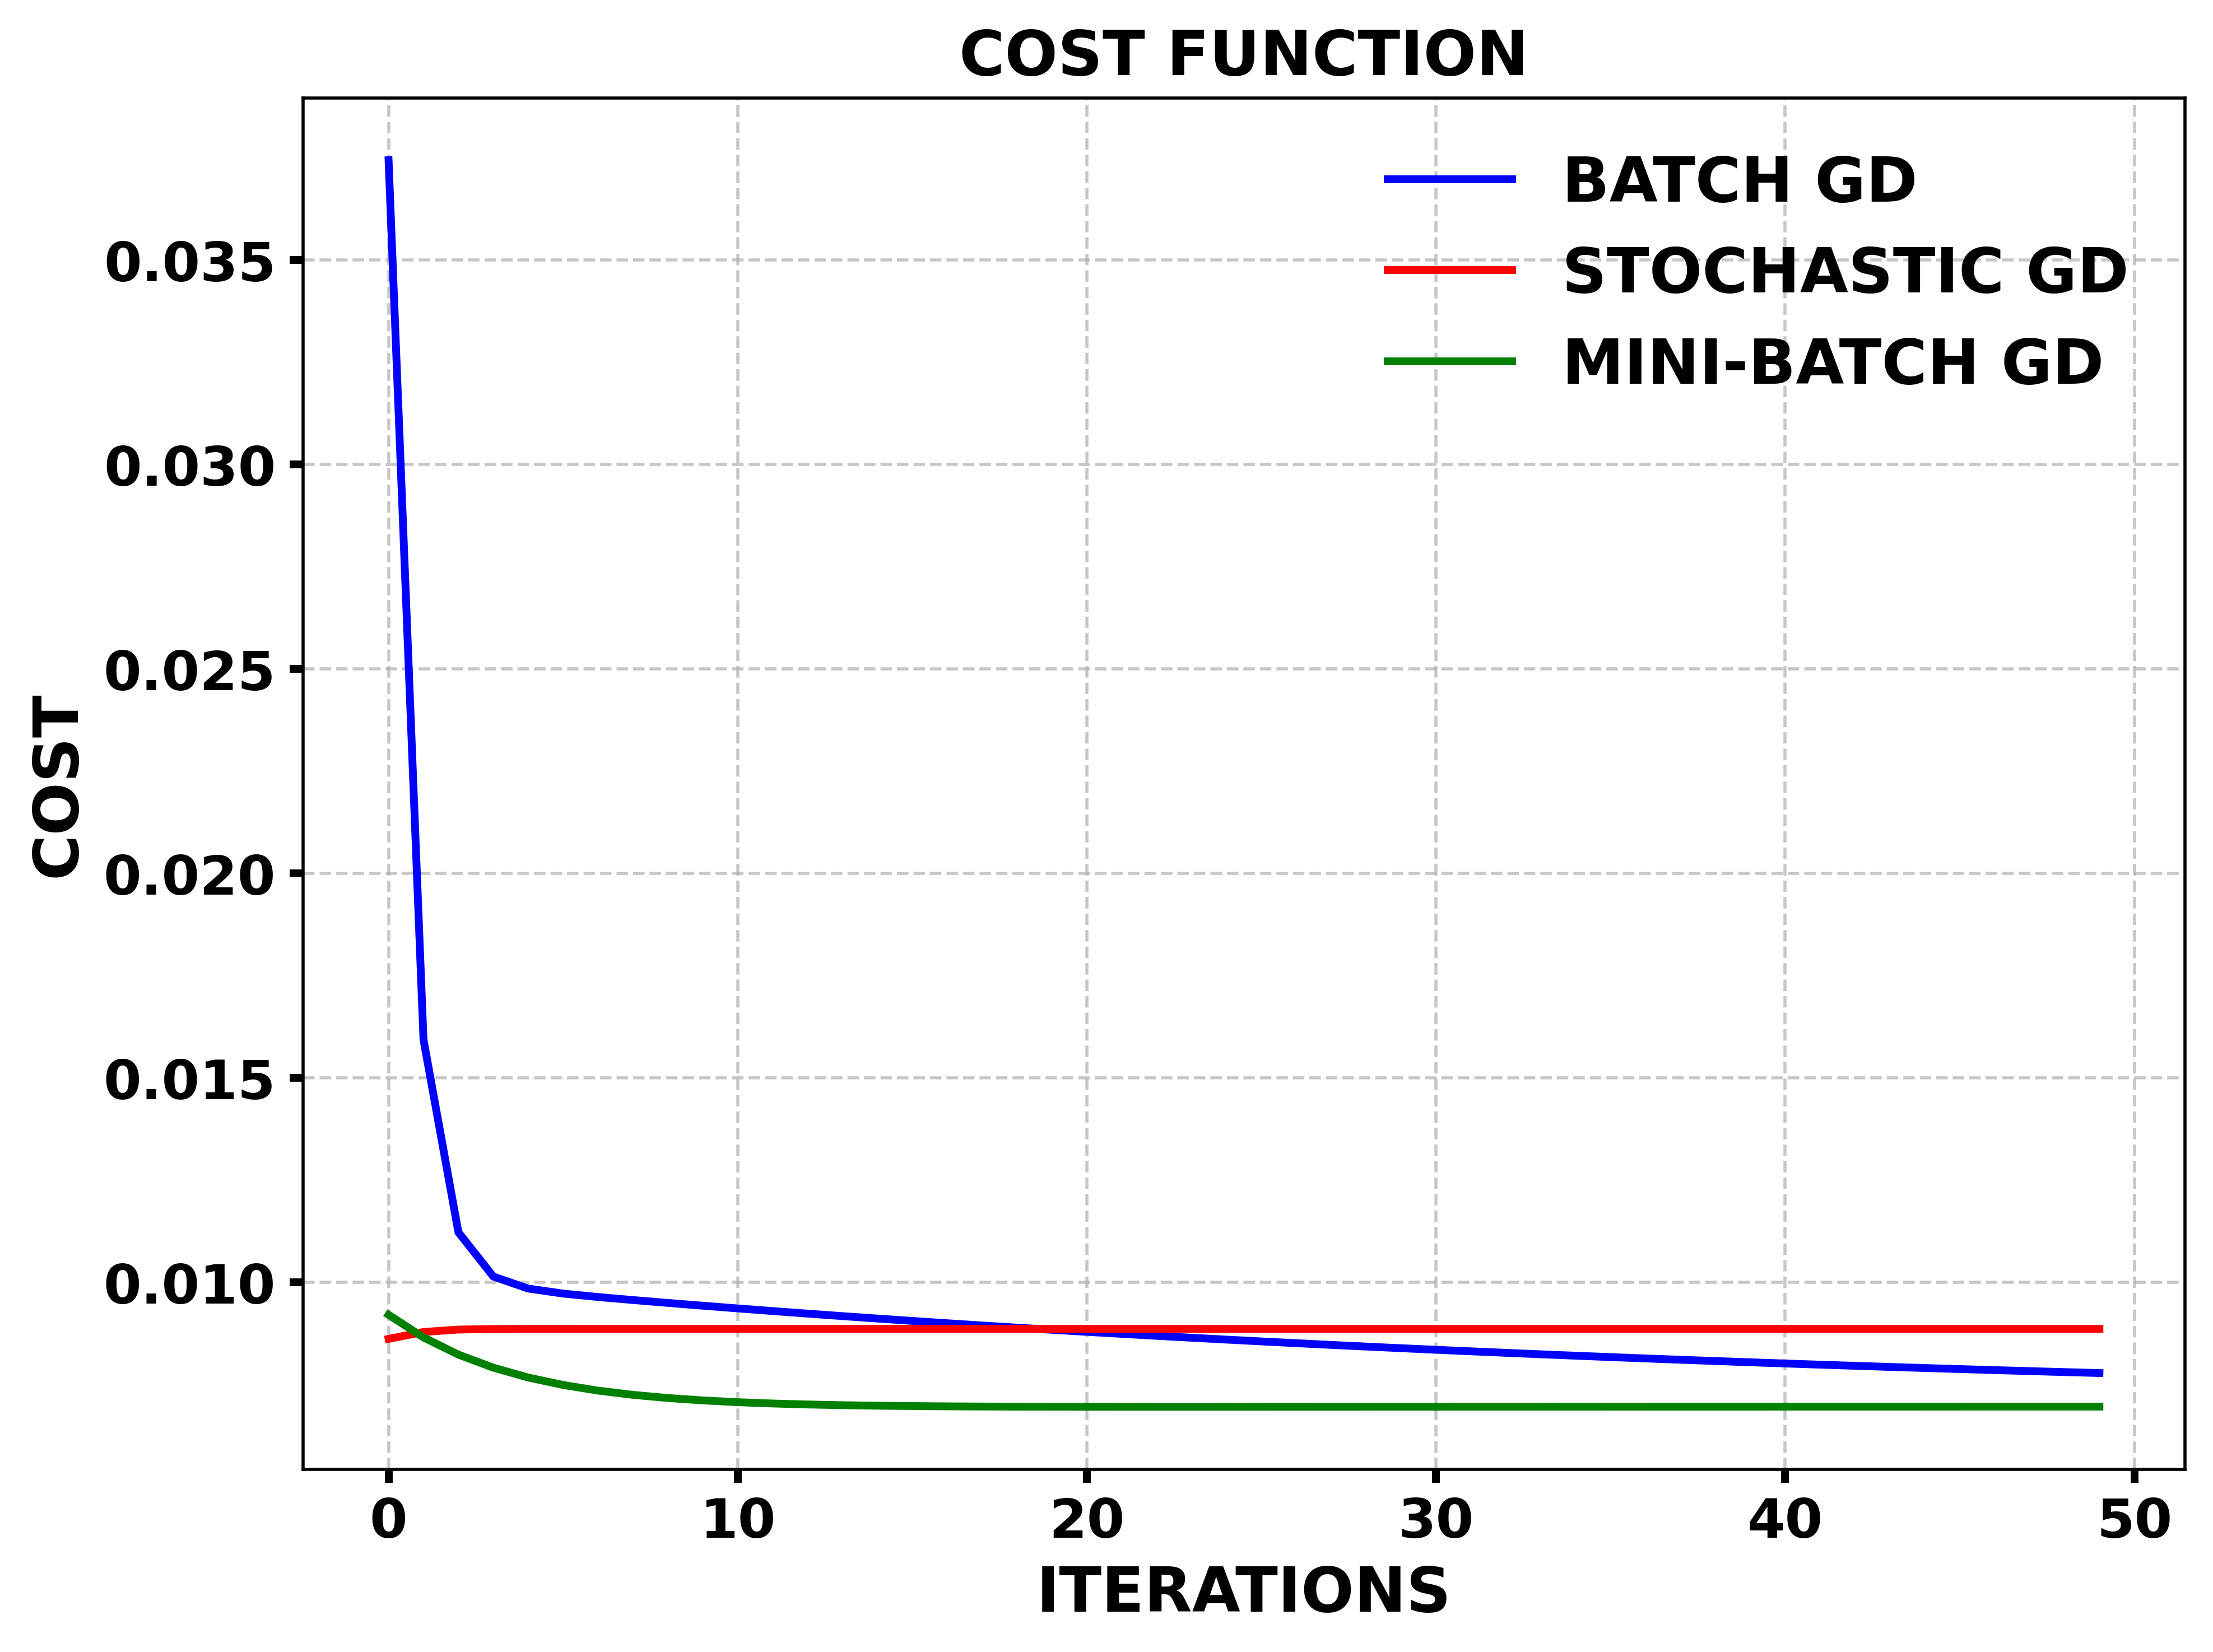

In [ ]:
theta, costs_batch = gradient_descent(X, y, np.zeros((2, 1)), learning_rate=learning_rate, iterations=iterations)

theta0_sgd, theta1_sgd, costs_sgd = stochastic_gradient_descent(X[:, 1], y, learning_rate=learning_rate, iterations=iterations)

theta0_mbgd, theta1_mbgd, costs_mbgd = mini_batch_gradient_descent(X[:, 1], y, learning_rate=learning_rate, iterations=iterations)

fig, ax = plt.subplots(figsize=(8, 6), dpi=500)

ax.plot(range(len(costs_batch)), costs_batch, label="BATCH GD", color="blue", linewidth=2)
ax.plot(range(len(costs_sgd)), costs_sgd, label="STOCHASTIC GD", color="red", linewidth=2)
ax.plot(range(len(costs_mbgd)), costs_mbgd, label="MINI-BATCH GD", color="green", linewidth=2)

ax.set_title("COST FUNCTION", fontsize=16, fontweight='bold')
ax.set_xlabel("ITERATIONS", fontsize=16, fontweight='bold')
ax.set_ylabel("COST", fontsize=16, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

ax.grid(True, linestyle='--', alpha=0.7)

legend = ax.legend(loc='upper right', fontsize=16, frameon=False)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Documents\AI_LAB\LinearRegression\GDs.png", dpi=500, bbox_inches='tight')
plt.show()